<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#module,-img-data-loading..." data-toc-modified-id="module,-img-data-loading...-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>module, img data loading...</a></span></li><li><span><a href="#얼굴검출" data-toc-modified-id="얼굴검출-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>얼굴검출</a></span><ul class="toc-item"><li><span><a href="#detector-선언" data-toc-modified-id="detector-선언-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>detector 선언</a></span></li><li><span><a href="#bounding-box의-좌표값을-추출하는-instance-생성" data-toc-modified-id="bounding-box의-좌표값을-추출하는-instance-생성-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>bounding box의 좌표값을 추출하는 instance 생성</a></span></li><li><span><a href="#face-landmark" data-toc-modified-id="face-landmark-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>face landmark</a></span></li></ul></li><li><span><a href="#스티커-적용하기" data-toc-modified-id="스티커-적용하기-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>스티커 적용하기</a></span></li><li><span><a href="#회고" data-toc-modified-id="회고-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>회고</a></span><ul class="toc-item"><li><span><a href="#Lesson-&amp;-learned" data-toc-modified-id="Lesson-&amp;-learned-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Lesson &amp; learned</a></span></li></ul></li></ul></div>

- 개요
    - 얼굴인식 카메라의 흐름이해
    - dlib 라이브러리 사용
    - 이미지 배열의 인덱싱 예외처리

# module, img data loading...

In [1]:
# 필요한 패키지 import 하기
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


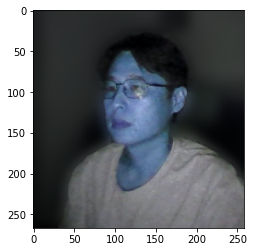

In [2]:
my_image_path = os.getenv('homepath') + '/aiffel/camera_sticker/images/image_sh_side_dark.png' 
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

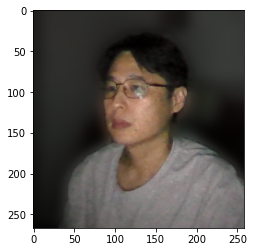

In [3]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

In [4]:
img_rgb.shape

(267, 259, 3)

# 얼굴검출

## detector 선언

In [5]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기 인스턴스 반환


##  bounding box의 좌표값을 추출하는 instance 생성

In [6]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) 
# dlib은 rgb 이미지를 입력으로 받기 때문에 cvtColor() 를 이용해서 opencv 의 bgr 이미지를 rgb로 변환

#bounding box의 좌표값을 추출하는 instance 생성
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid- 1: 원본크기 사용)


rectangles[[(66, 66) (155, 156)]]


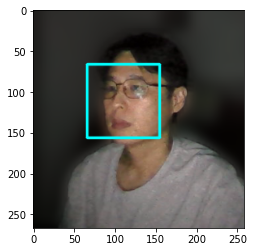

In [7]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   


for dlib_rect in dlib_rects: # rectangles[[(191, 142) (414, 365)]] 찾은 얼굴 영역의 좌표 (좌측 상단의 좌표와, 우측하단의 좌표 값을 반환)
    l = dlib_rect.left() # 왼쪽 92
    t = dlib_rect.top() # 위쪽 167
    r = dlib_rect.right() # 오른쪽 315
    b = dlib_rect.bottom() # 아래쪽 390 
    # rectangles[[(92, 167) (315, 390)]]
    cv2.rectangle(img_show, (l,t), (r,b), (255,255,0), 2, lineType=cv2.LINE_AA) 
    # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림
    # cv2.rectangle(img, pt1, pt2, color[r,g,b], thickness, lineType )

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [8]:
dlib_rects # 좌측 상단의 좌표와, 우측하단의 좌표 값을 반환

rectangles[[(66, 66) (155, 156)]]

In [9]:
print("l: {}," .format(l))
print("t {}," .format(t))
print("r {}," .format(r))
print("b {}," .format(b))

l: 66,
t 66,
r 155,
b 156,


## face landmark

In [10]:
model_path = os.getenv('homepath') + '/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄
print("🌫🛸")

🌫🛸


In [11]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        #landmark_predictor모델을 사용하여 landmark의 위치정보를 가져와, point변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


In [12]:
type( list_points)
list_points

[(88, 101),
 (85, 110),
 (85, 120),
 (87, 130),
 (89, 139),
 (92, 147),
 (95, 156),
 (99, 163),
 (107, 166),
 (117, 165),
 (130, 162),
 (142, 156),
 (153, 150),
 (161, 141),
 (166, 129),
 (167, 116),
 (169, 102),
 (89, 87),
 (91, 83),
 (94, 82),
 (98, 82),
 (102, 85),
 (113, 83),
 (121, 81),
 (130, 80),
 (138, 83),
 (145, 89),
 (106, 95),
 (104, 102),
 (101, 108),
 (98, 115),
 (97, 122),
 (99, 124),
 (102, 125),
 (106, 123),
 (111, 122),
 (93, 97),
 (95, 94),
 (99, 95),
 (103, 98),
 (99, 99),
 (95, 99),
 (121, 97),
 (123, 93),
 (128, 93),
 (133, 96),
 (129, 98),
 (124, 98),
 (98, 141),
 (97, 135),
 (100, 133),
 (103, 134),
 (106, 133),
 (113, 135),
 (119, 140),
 (113, 144),
 (107, 146),
 (103, 146),
 (100, 146),
 (98, 144),
 (99, 140),
 (100, 138),
 (103, 138),
 (106, 138),
 (117, 140),
 (107, 140),
 (103, 140),
 (100, 140)]

In [13]:
list_landmarks[0]

[(88, 101),
 (85, 110),
 (85, 120),
 (87, 130),
 (89, 139),
 (92, 147),
 (95, 156),
 (99, 163),
 (107, 166),
 (117, 165),
 (130, 162),
 (142, 156),
 (153, 150),
 (161, 141),
 (166, 129),
 (167, 116),
 (169, 102),
 (89, 87),
 (91, 83),
 (94, 82),
 (98, 82),
 (102, 85),
 (113, 83),
 (121, 81),
 (130, 80),
 (138, 83),
 (145, 89),
 (106, 95),
 (104, 102),
 (101, 108),
 (98, 115),
 (97, 122),
 (99, 124),
 (102, 125),
 (106, 123),
 (111, 122),
 (93, 97),
 (95, 94),
 (99, 95),
 (103, 98),
 (99, 99),
 (95, 99),
 (121, 97),
 (123, 93),
 (128, 93),
 (133, 96),
 (129, 98),
 (124, 98),
 (98, 141),
 (97, 135),
 (100, 133),
 (103, 134),
 (106, 133),
 (113, 135),
 (119, 140),
 (113, 144),
 (107, 146),
 (103, 146),
 (100, 146),
 (98, 144),
 (99, 140),
 (100, 138),
 (103, 138),
 (106, 138),
 (117, 140),
 (107, 140),
 (103, 140),
 (100, 140)]

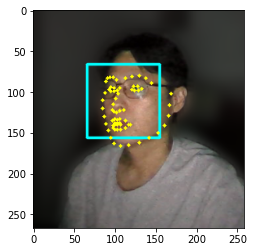

In [14]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

# 스티커 적용하기

In [15]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# → rectangles[[(345, 98) (531, 284)]]
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))
# → [[(368, 153), (368, 174), (371, 195), (376, 215), (382, 235), (391, 252), (404, 266), (420, 277), (441, 279), (461, 276), 
#      (480, 266), (495, 252), (508, 235), (516, 216), (520, 195), (523, 173), (524, 151), (377, 131), (386, 119), (399, 116), 
#      (413, 118), (425, 124), (454, 121), (466, 114), (481, 112), (494, 114), (503, 127), (439, 143), (438, 156), (438, 169), 
#      (437, 182), (423, 197), (431, 199), (438, 200), (446, 199), (454, 197), (391, 147), (399, 142), (409, 143), (416, 149), 
#      (408, 150), (399, 150), (464, 147), (472, 141), (482, 141), (489, 145), (482, 149), (473, 149), (411, 227), (421, 222), 
#      (432, 218), (439, 220), (446, 218), (458, 222), (471, 227), (458, 234), (446, 238), (438, 238), (431, 238), (420, 235), 
#      (415, 227), (432, 227), (439, 228), (447, 227), (466, 227), (446, 228), (438, 229), (431, 228)]]

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): 
    # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[8]) # list_landmarks의 8번째 인덱스
    x = landmark[8][0] # 이미지에서 턱 부위의 x값
    y = landmark[8][1] - int(dlib_rect.height()//2.5)
    # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (437, 182-(186+1//2))
    w = h = int(0.4*dlib_rect.width()) 
    # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(107, 166)
(x,y) : (107,130)
(w,h) : (36,36)


In [16]:
landmark[8]

(107, 166)

In [17]:
landmark[8][0] 

107

In [18]:
sticker_path = os.getenv('homepath')+'/aiffel/camera_sticker/images/piercing.png' # 코 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) 
# 스티커 이미지 조정 → int형으로 변경
print (img_sticker.shape) # 사이즈를 조정한 이미지의 차원 확인

(36, 36, 3)


In [36]:
# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임
# x는 이미지에서 코 부위의 x값 = 308
# y는 이미지에서 코 부위의 y값 = 131
# w는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 67
# h는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 67
refined_x = x - int(w //1.5)# 308 - (67//1.5) = 234
refined_y = y - h # 131-67 = 144
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
# 즉, refined_x, refined_y값에서 왕관 이미지가 시작됨
print (f'(x,y) : ({refined_x},{refined_y})') # 음수 발생 : 이미지 범위를 벗어남
# 우리는 현재 이마 자리에 왕관을 두고 싶은건데, 이마위치 - 왕관 높이를 했더니 이미지의 범위를 초과하여 음수가 나오는 것
# opencv는 ndarray데이터를 사용하는데, ndarray는 음수인덱스에 접근 불가하므로 
# 스티커 이미지를 잘라 줘야 한다.

(x,y) : (83,94)


In [20]:
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# 현재 상황에서는 -y 크기만큼 스티커를 crop 하고, top 의 x좌표와 y 좌표를 각각의 경우에 맞춰 원본 이미지의 경계 값으로 수정하면 아래와 같은 형식으로 나옵니다.
# 음수값 만큼 왕관 이미지(혹은 추후 적용할 스티커 이미지)를 자른다.
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:] # [y, x]
    refined_x = 0
# 왕관 이미지를 씌우기 위해 왕관 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] 
    # refined_y가 -98이므로, img_sticker[98: , :]가 된다. (187, 187, 3)에서 (89, 187, 3)이 됨 (187개 중에서 98개가 잘려나감)
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (83,94)


In [21]:
img_sticker.shape

(36, 36, 3)

In [32]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# 왕관 이미지에서 사용할 부분은 0이 아닌 색이 있는 부분을 사용합니다.
# '0'인부분은 투명하게 표시됨
img_show[refined_y : refined_y+img_sticker.shape[0], refined_x : refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker)astype(np.uint8)

'''np.where를 통해 img_sticker 가 0 인 부분은 sticker_area를 사용하고 0이 아닌 부분을 img_sticker를 사용. 
  img_show 에 다시 적용'''

# where함수는 조건문을 사용할 때. 출력은 근본적으로는 인덱스. 
# numpy.where(condition, [x, y, ]/)
# Parameters
# conditionarray_like, bool
# Where True, yield x, otherwise yield y.

type(sticker_area)
type(img_sticker)

numpy.ndarray

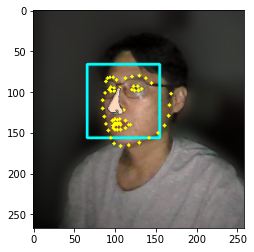

In [33]:
# 코 이미지를 적용한 이미지를 보여준다.
# 얼굴 영역(7-3)과 랜드마크(7-4)를 미리 적용해놓은 img_show에 왕관 이미지를 덧붙인 이미지가 나오게 된다.)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

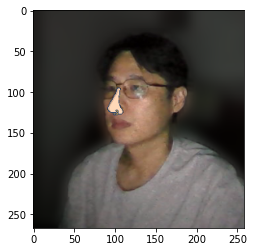

In [39]:
# 피어싱 이미지
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다. 
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
#dst = cv2.addWeighted(img_bgr, 0.7, img_sticker, 0.3, 0)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원 이미지에 piercing 코이미지를 덮어 씌운 이미지
plt.show()

# 회고

## Lesson & learned
- dlib.full_object_detection은 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 잘 잡아내고 있음. (해당 이미지의 경우 윤곽이 뚜렷한 편이라 인식이 잘되는 것을 확인하였으나, 선명도가 낮아질 경우에는 Detection이 잘 되지 않을 것으로 보임. (HOG특성을 사용한 뒤 그 결과를 분류하는 선형 분류기(linear classifier)를 이용하는 방식으로 구현되기 때문)

- 이외 얼굴인식 카메라의 흐름 및 라이브러시사용, 이미지 배열의 인덱싱처리 방법을 알수 있는 pjt였음.